## EDA with Python Applying Logistic Regression

* Feature Engineering :Handling the missing Values
We'll be trying to predict a classification-survival or deceased .let's begin our understanding of implementing logistic regressio in python for classification

we'll use 'Semi cleaned' versio of the titanic dataset,if we use the ddataset hosted directly on kaggle we may need to do some additioal cleanng not shown in the lecturer notebook

## Importinig Libraries
Lets import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"C:\Users\USER\Downloads\titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis
Let's Begin some exploratory Data analysis by checking out missing values

## Missing Data
we can use seaborn to create a simple heatmap to see where are missing values

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above we can obseve that there are 177 values are missing from the age and 687 misssing values from cabin

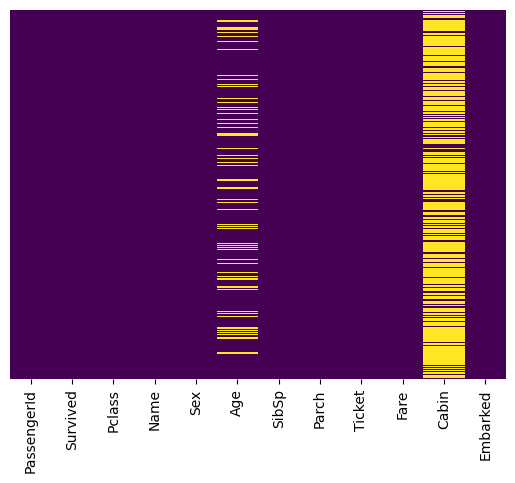

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [9]:
train.shape

(891, 12)

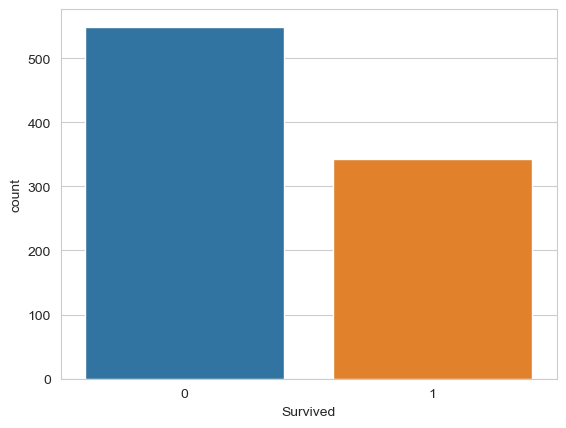

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.show()

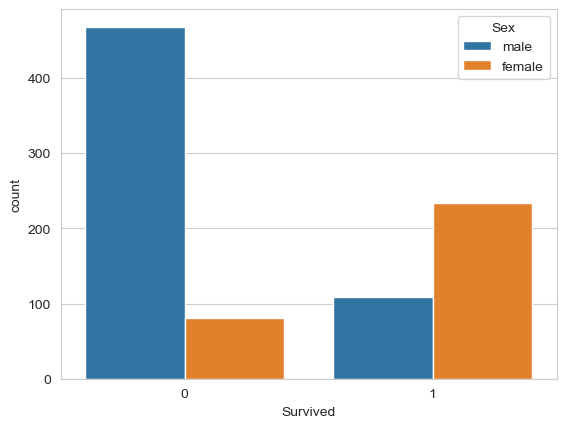

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)
plt.show()

* From the above count plot we can observe that there are more men died than females
* we can also observe that more number of females Survived

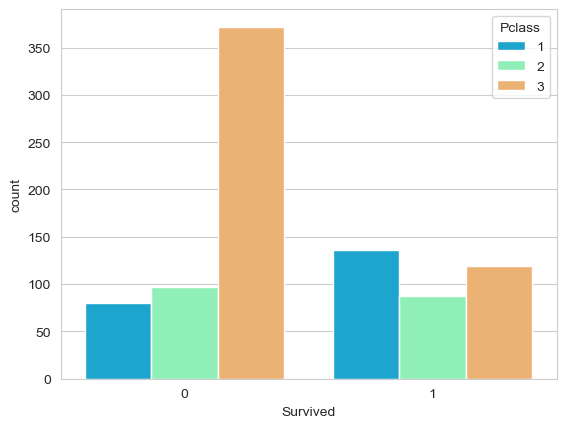

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.show()

* from the above we can see that Pclass"1" people died less compared to Pclass "2" and Pclass"3".
* we can also observe that Pclass "1"and Pclass "3" survived more compared to Pclass"2"

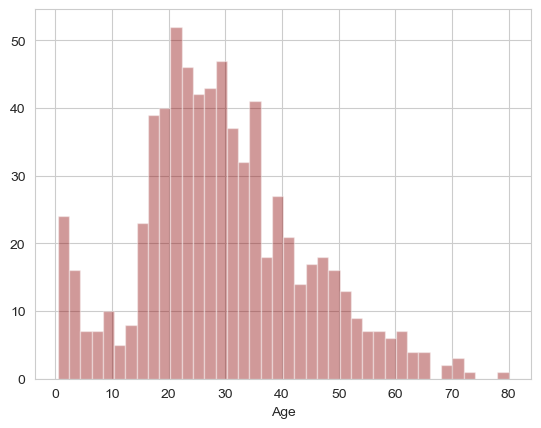

In [16]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
plt.show()

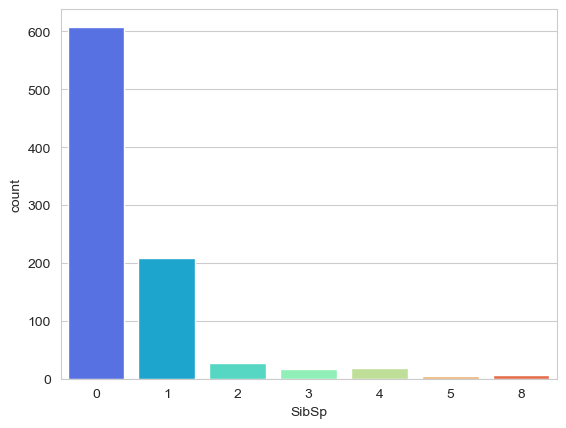

In [19]:
sns.countplot(x='SibSp',data=train,palette='rainbow')
plt.show()

we can see that not many people had siblings or spouse on the ship

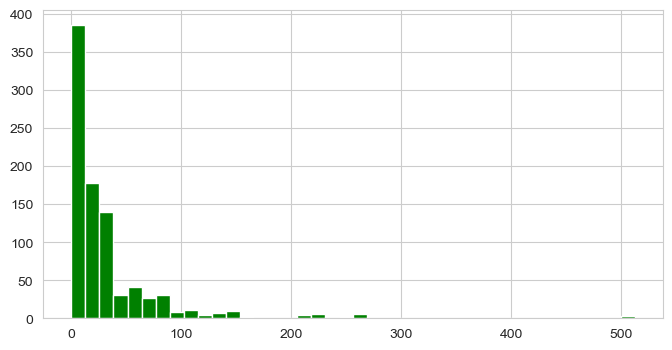

In [20]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

## Data Cleaning

we wnt to fill in the missing age data instead of just dropping the missing age data rows.one way to do this is by filling in the mean age of all the passengers(imputation).However we can be smarter about this and check the avearage age by passenger class for example

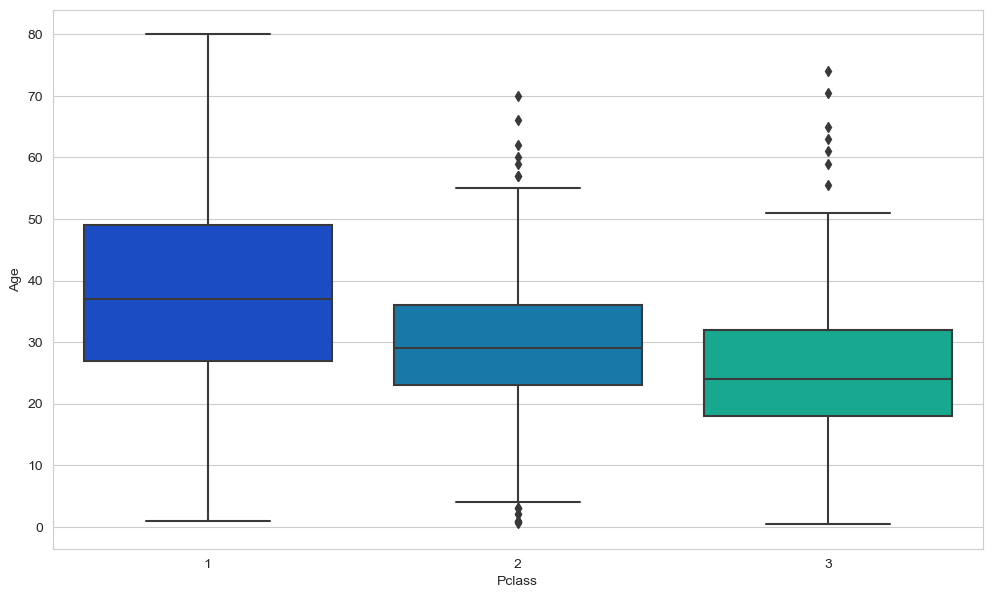

In [21]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
plt.show()

we can see that weather passenger in the higher class tend to be older,which makes sense.we'll use these average age values to impute based on Pclass for age

In [25]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
    
        else:
            return 24
    
    else:
        return Age

In [28]:
train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)

In [32]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
train.shape

(891, 12)

from the cabin column there are more than 75% of the values are missing cabin does not gona make a dofference in the model we will drop the Cabin column

In [36]:
train.drop('Cabin',axis=1,inplace=True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

From the above we can see that there is only 2 missing values in the Embared it will not make a difference hence there are no missing values

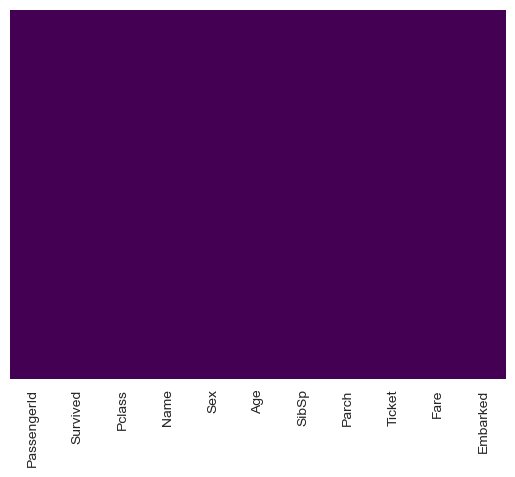

In [39]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

*** From the above Heatmap also we can see that there are no missing values

In [41]:
train.shape

(891, 11)

## Converting Categorical Values

we'll need to convert categorical features to dummy variables using pandas Otherwise our machine learning algoritham won't be able to directly take those features as inputs

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [44]:
train1=train.copy

In [49]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [50]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [52]:
train=pd.concat([train,sex,embark],axis=1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Our data is ready to build model

## Building a Logistic Regression Model

In [54]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [55]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X=train.drop('Survived',axis=1)

In [58]:
y=train['Survived']

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=101,)

In [64]:
X_train.shape,y_train.shape

((712, 9), (712,))

In [65]:
X_test.shape,y_test.shape

((179, 9), (179,))

## Training and Predictiing

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
pred=logmodel.predict(X_test)

In [71]:
accuracy=confusion_matrix(y_test,pred)

In [72]:
accuracy

array([[101,   9],
       [ 34,  35]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.7597765363128491

In [75]:
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)